In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [2]:
s = '101011'
n=len(s)

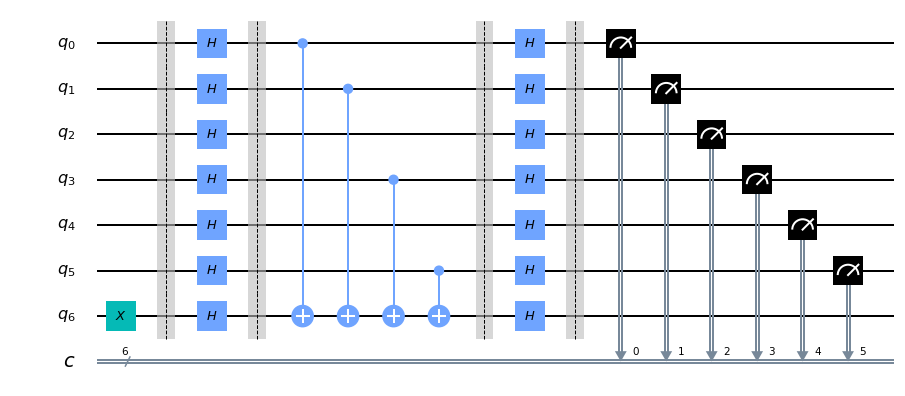

In [3]:
c = QuantumCircuit(n+1,n)
c.x(n)
c.barrier()

c.h(range(n+1))
c.barrier()

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1':
        c.cx(ii,n)

c.barrier()
c.h(range(n+1))

c.barrier()
c.measure(range(n),range(n))

c.draw(output='mpl')

{'101011': 1024}


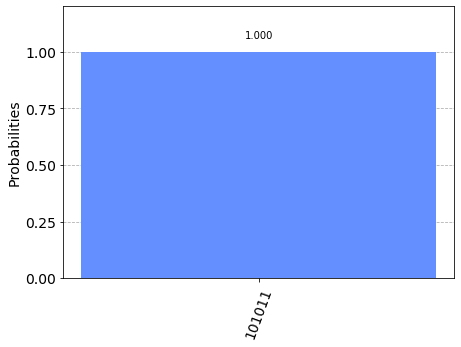

In [4]:
#simulate on qiskit aer
sim = Aer.get_backend('qasm_simulator')
sres = execute(c, backend = sim, shots = 1024).result()

counts = sres.get_counts(c)
print(counts)
plot_histogram(sres.get_counts(c))

In [8]:
#running on a real quantum device
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(c, backend=qcomp, shots = 1024)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


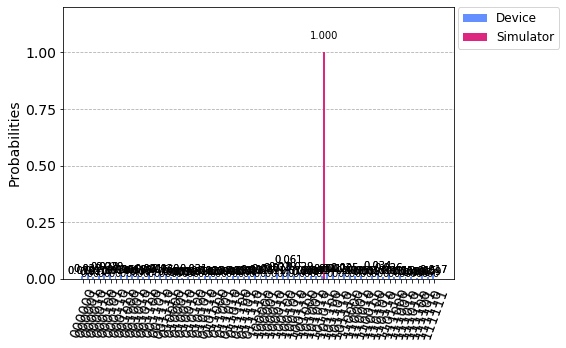

In [9]:
qres = job.result()
plot_histogram([qres.get_counts(c), sres.get_counts(c)], legend=['Device', 'Simulator'])